In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset¶
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
#Exploratory Data Analysis

Text(0.5, 0, 'Age')

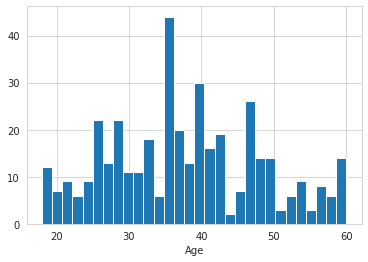

In [7]:
sns.set_style('whitegrid')
dataset['Age'].hist(bins=30)
plt.xlabel('Age')

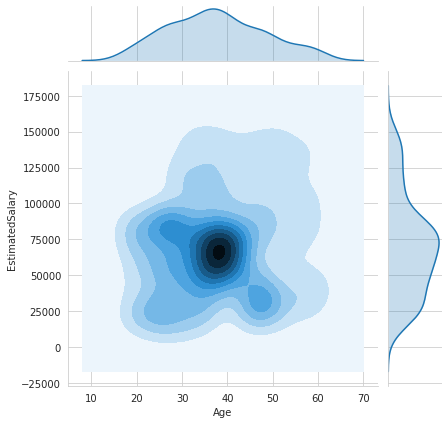

In [8]:
sns.jointplot(x='Age',y='EstimatedSalary',data=dataset,kind='kde')

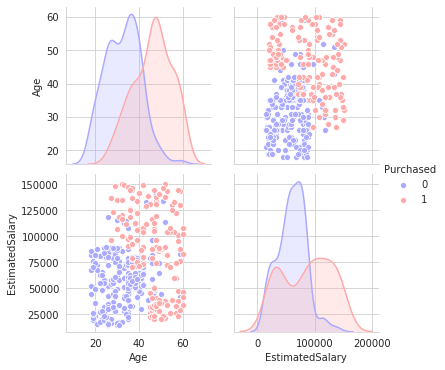

In [9]:
sns.pairplot(dataset,hue='Purchased',palette='bwr')

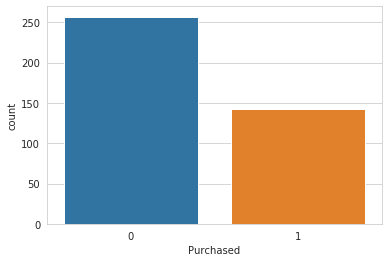

In [10]:
sns.countplot(x='Purchased',data=dataset)

In [11]:
#1.Logistic Regression Approach

In [12]:
#Splitting the dataset into the Training set and Test set¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
#Training the Logistic Regression model on the Training set¶
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

In [17]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
  
  
# Instantiating RandomizedSearchCV object 
log_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
log_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_)) 

/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.8266666666666668


In [18]:
#Hyperparameter tuning with GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.67 %
Best Parameters: {'C': 10}


In [19]:
classifier_new = LogisticRegression(C=10,random_state = 0)
classifier_new.fit(X_train, y_train)
y_pred_new = classifier_new.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_new)
print(cm)
accuracy_score(y_test, y_pred_new)

[[65  3]
 [ 8 24]]


0.89

In [21]:
#K-Cross Validation #Updated Logistic Regression with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.67 %
Standard Deviation: 9.52 %


In [22]:
#2. KNN Approach

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[64  4]
 [ 3 29]]


0.93

In [25]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Instantiating RandomizedSearchCV object 
hyper_cv = RandomizedSearchCV(classifier1,hyperparameters, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
hyper_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(hyper_cv.best_params_)) 
print("Best score is {}".format(hyper_cv.best_score_)) 

Tuned KNN Parameters: {'p': 1, 'n_neighbors': 9, 'leaf_size': 19}
Best score is 0.9066666666666666


In [26]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search1 = GridSearchCV(estimator = classifier1,
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search1.fit(X_train, y_train)
best_accuracy_1 = grid_search1.best_score_
best_parameters_1 = grid_search1.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_1*100))
print("Best Parameters:", best_parameters_1)

Best Accuracy: 91.00 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 11, 'p': 2}


In [27]:
classifier1_new = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size=1)
classifier1_new.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1_new = classifier1_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred1_new)
print(cm)
accuracy_score(y_test, y_pred1_new)

[[64  4]
 [ 3 29]]


0.93

In [29]:
#K-Cross Validation #Updated KNN with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 91.00 %
Standard Deviation: 5.59 %


In [30]:
#3. SVM Approach

In [31]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[66  2]
 [ 8 24]]


0.9

In [33]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(classifier2,param_dist2, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVR Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVR Parameters: {'kernel': 'rbf', 'gamma': 0.9, 'degree': 4, 'C': 0.5}
Best score is 0.9066666666666666


In [34]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_accuracy1 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_accuracy1*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 90.67 %
Best Parameters: {'C': 0.5, 'degree': 1, 'gamma': 0.6, 'kernel': 'rbf'}


In [35]:
classifier2_new = SVC(kernel = 'rbf',C=0.50,degree=1,gamma=0.6, random_state = 0)
classifier2_new.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2_new = classifier2_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred2_new)
print(cm)
accuracy_score(y_test, y_pred2_new)

[[64  4]
 [ 3 29]]


0.93

In [37]:
#K-Cross Validation #Updated SVC with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))


Accuracy: 90.67 %
Standard Deviation: 6.11 %


In [38]:
#4. Naive Bayes Approach

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[65  3]
 [ 7 25]]


0.9

In [41]:
#K-Cross Validation #Updated Naive Bayes with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))


Accuracy: 87.67 %
Standard Deviation: 8.95 %


In [42]:
#5.Decision Tree Classification Approach

In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[62  6]
 [ 3 29]]


0.91

In [47]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist4 = {"max_depth": [2, 6, 8,10,12,14], 
              "max_features": randint(1, 9),
              "min_samples_split": randint(2,40),
              "min_samples_leaf": randint(1, 9),
              "max_leaf_nodes": randint(1, 100),
              "criterion": ["gini", "entropy"]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv4 = RandomizedSearchCV(classifier4,param_dist4, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv4.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv4.best_params_)) 
print("Best score is {}".format(tree_cv4.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 1, 'max_leaf_nodes': 16, 'min_samples_leaf': 7, 'min_samples_split': 35}
Best score is 0.8966666666666667


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid4 = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,4,10, 20,24,26],
              "max_features": [2,4,5,6],
              "max_depth": [8,10,12,14,16],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,100]
              }
grid_search4 = GridSearchCV(estimator = classifier4,
                           param_grid = param_grid4,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search4.fit(X_train, y_train)
best_accuracy_score4 = grid_search4.best_score_
best_parameters4 = grid_search4.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy_score4*100))
print("Best Parameters:", best_parameters4)

Best Accuracy_score: 90.67 %
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_samples_split': 24}


In [49]:
classifier4_new = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=8,max_features=2,min_samples_leaf=6,min_samples_split=24,max_leaf_nodes=10)
classifier4_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=2, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=24,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4_new = classifier4_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred4_new)
print(cm)
accuracy_score(y_test, y_pred4_new)

[[64  4]
 [ 2 30]]


0.94

In [51]:
#K-Cross Validation #Updated Decision Tree with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))


Accuracy: 90.67 %
Standard Deviation: 6.29 %


In [52]:
# 6. Random Forest Classification Approach
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[63  5]
 [ 4 28]]


0.91

In [54]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv5 = RandomizedSearchCV(classifier5,param_dist5, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv5.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv5.best_params_)) 
print("Best score is {}".format(tree_cv5.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'gini'}
Best score is 0.9066666666666666


In [55]:
from sklearn.model_selection import GridSearchCV
param_grid5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2,4,8,10]  
            }

grid_search5 = GridSearchCV(estimator = classifier5,
                           param_grid = param_grid5,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search5.fit(X_train, y_train)
best_accuracy5 = grid_search5.best_score_
best_parameters5 = grid_search5.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy5*100))
print("Best Parameters:", best_parameters5)


Best Accuracy_score: 90.67 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 20}


In [56]:
classifier5_new = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 0,max_depth=4,min_samples_split=8)
classifier5_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5_new = classifier5_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred5_new)
print(cm)
accuracy_score(y_test, y_pred5_new)

[[64  4]
 [ 2 30]]


0.94

In [58]:
#K-Cross Validation #Updated Random Forest with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier5_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))


Accuracy: 90.00 %
Standard Deviation: 7.30 %


In [59]:
#7. XGBOOST Classification

In [60]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[65  3]
 [ 3 29]]


0.94

In [62]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist6 = {"n_estimators": [10,30,50,100,200],"min_child_weight":[1,2,3,4,5],
               "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
            "max_depth": [3,4,5,6,7,8,9,10],
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.01,0.1,1]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv6 = RandomizedSearchCV(classifier6,param_dist6, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv6.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv6.best_params_)) 
print("Best score is {}".format(tree_cv6.best_score_)) 

Tuned XGboost Parameters: {'subsample': 0.9, 'reg_alpha': 1, 'n_estimators': 30, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.8}
Best score is 0.8833333333333334


In [63]:
classifier6_new = XGBClassifier(n_estimators = 100,subsample= 0.8,reg_alpha= 1e-05 , random_state = 0,max_depth=5,
                                min_child_weight= 4,learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.9)
classifier6_new.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6_new = classifier6_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred6_new)
print(cm)
accuracy_score(y_test, y_pred6_new)

[[64  4]
 [ 4 28]]


0.92

In [65]:
#K-Cross Validation #Updated XGBoost with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))


Accuracy: 90.33 %
Standard Deviation: 6.40 %


In [66]:
#8. Catboost Classifier

In [67]:
from catboost import CatBoostClassifier
classifier8 = CatBoostClassifier()
classifier8.fit(X_train, y_train)

Learning rate set to 0.006161
0:	learn: 0.6872926	total: 75ms	remaining: 1m 14s
1:	learn: 0.6799471	total: 76.6ms	remaining: 38.2s
2:	learn: 0.6721264	total: 77.6ms	remaining: 25.8s
3:	learn: 0.6652568	total: 78.5ms	remaining: 19.5s
4:	learn: 0.6586874	total: 79.3ms	remaining: 15.8s
5:	learn: 0.6522441	total: 80.1ms	remaining: 13.3s
6:	learn: 0.6454735	total: 81.1ms	remaining: 11.5s
7:	learn: 0.6390894	total: 82ms	remaining: 10.2s
8:	learn: 0.6318089	total: 82.9ms	remaining: 9.13s
9:	learn: 0.6250851	total: 83.9ms	remaining: 8.31s
10:	learn: 0.6185944	total: 84.8ms	remaining: 7.63s
11:	learn: 0.6135007	total: 85.7ms	remaining: 7.06s
12:	learn: 0.6077418	total: 86.5ms	remaining: 6.57s
13:	learn: 0.6017832	total: 87.4ms	remaining: 6.16s
14:	learn: 0.5956528	total: 88.3ms	remaining: 5.79s
15:	learn: 0.5906843	total: 89.1ms	remaining: 5.48s
16:	learn: 0.5861526	total: 90.7ms	remaining: 5.24s
17:	learn: 0.5807810	total: 91.7ms	remaining: 5s
18:	learn: 0.5758800	total: 92.6ms	remaining: 4.78

227:	learn: 0.2398269	total: 297ms	remaining: 1s
228:	learn: 0.2394137	total: 298ms	remaining: 1s
229:	learn: 0.2389888	total: 300ms	remaining: 1s
230:	learn: 0.2387113	total: 301ms	remaining: 1s
231:	learn: 0.2382930	total: 302ms	remaining: 1s
232:	learn: 0.2377590	total: 303ms	remaining: 999ms
233:	learn: 0.2374063	total: 305ms	remaining: 997ms
234:	learn: 0.2369356	total: 306ms	remaining: 996ms
235:	learn: 0.2365469	total: 307ms	remaining: 994ms
236:	learn: 0.2362167	total: 308ms	remaining: 993ms
237:	learn: 0.2359681	total: 310ms	remaining: 991ms
238:	learn: 0.2356297	total: 311ms	remaining: 990ms
239:	learn: 0.2352665	total: 312ms	remaining: 988ms
240:	learn: 0.2349198	total: 314ms	remaining: 987ms
241:	learn: 0.2345959	total: 315ms	remaining: 986ms
242:	learn: 0.2341997	total: 316ms	remaining: 985ms
243:	learn: 0.2339507	total: 317ms	remaining: 983ms
244:	learn: 0.2336032	total: 319ms	remaining: 982ms
245:	learn: 0.2332048	total: 320ms	remaining: 980ms
246:	learn: 0.2328792	total

386:	learn: 0.2039639	total: 479ms	remaining: 758ms
387:	learn: 0.2037312	total: 482ms	remaining: 760ms
388:	learn: 0.2035959	total: 483ms	remaining: 758ms
389:	learn: 0.2034203	total: 484ms	remaining: 757ms
390:	learn: 0.2033039	total: 485ms	remaining: 755ms
391:	learn: 0.2032353	total: 486ms	remaining: 754ms
392:	learn: 0.2030519	total: 488ms	remaining: 754ms
393:	learn: 0.2028939	total: 489ms	remaining: 753ms
394:	learn: 0.2027694	total: 491ms	remaining: 752ms
395:	learn: 0.2026332	total: 492ms	remaining: 751ms
396:	learn: 0.2024561	total: 494ms	remaining: 750ms
397:	learn: 0.2022899	total: 495ms	remaining: 749ms
398:	learn: 0.2022220	total: 496ms	remaining: 748ms
399:	learn: 0.2019978	total: 498ms	remaining: 746ms
400:	learn: 0.2017846	total: 499ms	remaining: 745ms
401:	learn: 0.2015769	total: 500ms	remaining: 744ms
402:	learn: 0.2013356	total: 501ms	remaining: 742ms
403:	learn: 0.2012341	total: 503ms	remaining: 741ms
404:	learn: 0.2010814	total: 504ms	remaining: 740ms
405:	learn: 

563:	learn: 0.1833054	total: 662ms	remaining: 511ms
564:	learn: 0.1831679	total: 665ms	remaining: 512ms
565:	learn: 0.1830165	total: 667ms	remaining: 511ms
566:	learn: 0.1828420	total: 668ms	remaining: 510ms
567:	learn: 0.1827770	total: 669ms	remaining: 509ms
568:	learn: 0.1826765	total: 670ms	remaining: 507ms
569:	learn: 0.1825949	total: 671ms	remaining: 506ms
570:	learn: 0.1824311	total: 672ms	remaining: 505ms
571:	learn: 0.1823753	total: 673ms	remaining: 504ms
572:	learn: 0.1823026	total: 674ms	remaining: 502ms
573:	learn: 0.1822463	total: 675ms	remaining: 501ms
574:	learn: 0.1820732	total: 676ms	remaining: 500ms
575:	learn: 0.1818945	total: 677ms	remaining: 499ms
576:	learn: 0.1817768	total: 678ms	remaining: 497ms
577:	learn: 0.1817451	total: 679ms	remaining: 496ms
578:	learn: 0.1816565	total: 680ms	remaining: 494ms
579:	learn: 0.1815598	total: 681ms	remaining: 493ms
580:	learn: 0.1814138	total: 682ms	remaining: 492ms
581:	learn: 0.1813089	total: 683ms	remaining: 490ms
582:	learn: 

749:	learn: 0.1672495	total: 843ms	remaining: 281ms
750:	learn: 0.1672124	total: 845ms	remaining: 280ms
751:	learn: 0.1671303	total: 846ms	remaining: 279ms
752:	learn: 0.1669925	total: 847ms	remaining: 278ms
753:	learn: 0.1669103	total: 848ms	remaining: 277ms
754:	learn: 0.1667803	total: 849ms	remaining: 276ms
755:	learn: 0.1666614	total: 850ms	remaining: 274ms
756:	learn: 0.1665936	total: 851ms	remaining: 273ms
757:	learn: 0.1664648	total: 852ms	remaining: 272ms
758:	learn: 0.1663870	total: 853ms	remaining: 271ms
759:	learn: 0.1663306	total: 855ms	remaining: 270ms
760:	learn: 0.1662300	total: 856ms	remaining: 269ms
761:	learn: 0.1661916	total: 856ms	remaining: 268ms
762:	learn: 0.1660958	total: 857ms	remaining: 266ms
763:	learn: 0.1660239	total: 858ms	remaining: 265ms
764:	learn: 0.1659311	total: 859ms	remaining: 264ms
765:	learn: 0.1658873	total: 860ms	remaining: 263ms
766:	learn: 0.1657907	total: 861ms	remaining: 262ms
767:	learn: 0.1657458	total: 862ms	remaining: 261ms
768:	learn: 

927:	learn: 0.1535670	total: 1.02s	remaining: 79.6ms
928:	learn: 0.1535342	total: 1.03s	remaining: 78.5ms
929:	learn: 0.1535163	total: 1.03s	remaining: 77.4ms
930:	learn: 0.1534420	total: 1.03s	remaining: 76.3ms
931:	learn: 0.1533709	total: 1.03s	remaining: 75.2ms
932:	learn: 0.1532931	total: 1.03s	remaining: 74.1ms
933:	learn: 0.1532290	total: 1.03s	remaining: 73ms
934:	learn: 0.1531688	total: 1.03s	remaining: 71.9ms
935:	learn: 0.1531282	total: 1.03s	remaining: 70.8ms
936:	learn: 0.1530891	total: 1.04s	remaining: 69.7ms
937:	learn: 0.1530403	total: 1.04s	remaining: 68.6ms
938:	learn: 0.1529765	total: 1.04s	remaining: 67.5ms
939:	learn: 0.1529153	total: 1.04s	remaining: 66.4ms
940:	learn: 0.1528298	total: 1.04s	remaining: 65.2ms
941:	learn: 0.1527833	total: 1.04s	remaining: 64.1ms
942:	learn: 0.1527437	total: 1.04s	remaining: 63ms
943:	learn: 0.1526214	total: 1.04s	remaining: 61.9ms
944:	learn: 0.1525523	total: 1.04s	remaining: 60.8ms
945:	learn: 0.1525113	total: 1.04s	remaining: 59.7

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred8 = classifier8.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[64  4]
 [ 3 29]]


0.93

In [69]:
#K-Cross Validation #Updated XGBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier8, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))


Learning rate set to 0.00589
0:	learn: 0.6872581	total: 1.01ms	remaining: 1.01s
1:	learn: 0.6807292	total: 2.09ms	remaining: 1.04s
2:	learn: 0.6729253	total: 2.98ms	remaining: 991ms
3:	learn: 0.6660996	total: 3.88ms	remaining: 966ms
4:	learn: 0.6591204	total: 4.76ms	remaining: 948ms
5:	learn: 0.6522726	total: 5.66ms	remaining: 938ms
6:	learn: 0.6459264	total: 6.55ms	remaining: 930ms
7:	learn: 0.6393302	total: 7.41ms	remaining: 919ms
8:	learn: 0.6318176	total: 8.28ms	remaining: 911ms
9:	learn: 0.6255584	total: 9.23ms	remaining: 914ms
10:	learn: 0.6195272	total: 10.1ms	remaining: 908ms
11:	learn: 0.6132918	total: 10.9ms	remaining: 901ms
12:	learn: 0.6076058	total: 11.8ms	remaining: 895ms
13:	learn: 0.6016556	total: 12.6ms	remaining: 889ms
14:	learn: 0.5960001	total: 13.5ms	remaining: 886ms
15:	learn: 0.5908449	total: 14.3ms	remaining: 881ms
16:	learn: 0.5854098	total: 15.2ms	remaining: 880ms
17:	learn: 0.5803127	total: 16.1ms	remaining: 876ms
18:	learn: 0.5746510	total: 17ms	remaining: 8

178:	learn: 0.2535200	total: 182ms	remaining: 834ms
179:	learn: 0.2529210	total: 184ms	remaining: 837ms
180:	learn: 0.2522568	total: 185ms	remaining: 836ms
181:	learn: 0.2516781	total: 186ms	remaining: 836ms
182:	learn: 0.2510230	total: 187ms	remaining: 836ms
183:	learn: 0.2503965	total: 188ms	remaining: 835ms
184:	learn: 0.2497446	total: 189ms	remaining: 835ms
185:	learn: 0.2489958	total: 191ms	remaining: 834ms
186:	learn: 0.2484467	total: 192ms	remaining: 833ms
187:	learn: 0.2477467	total: 193ms	remaining: 833ms
188:	learn: 0.2471092	total: 194ms	remaining: 832ms
189:	learn: 0.2466623	total: 195ms	remaining: 832ms
190:	learn: 0.2461920	total: 197ms	remaining: 834ms
191:	learn: 0.2456692	total: 198ms	remaining: 832ms
192:	learn: 0.2453317	total: 198ms	remaining: 830ms
193:	learn: 0.2448580	total: 199ms	remaining: 828ms
194:	learn: 0.2442319	total: 200ms	remaining: 827ms
195:	learn: 0.2436253	total: 201ms	remaining: 825ms
196:	learn: 0.2432150	total: 202ms	remaining: 823ms
197:	learn: 

360:	learn: 0.1931097	total: 364ms	remaining: 645ms
361:	learn: 0.1928262	total: 366ms	remaining: 644ms
362:	learn: 0.1926094	total: 367ms	remaining: 644ms
363:	learn: 0.1924776	total: 368ms	remaining: 643ms
364:	learn: 0.1922750	total: 369ms	remaining: 642ms
365:	learn: 0.1920444	total: 370ms	remaining: 640ms
366:	learn: 0.1919251	total: 370ms	remaining: 639ms
367:	learn: 0.1917036	total: 372ms	remaining: 638ms
368:	learn: 0.1915523	total: 373ms	remaining: 637ms
369:	learn: 0.1914140	total: 374ms	remaining: 636ms
370:	learn: 0.1913039	total: 374ms	remaining: 635ms
371:	learn: 0.1911190	total: 375ms	remaining: 634ms
372:	learn: 0.1908997	total: 377ms	remaining: 633ms
373:	learn: 0.1907253	total: 378ms	remaining: 633ms
374:	learn: 0.1905535	total: 379ms	remaining: 632ms
375:	learn: 0.1903700	total: 381ms	remaining: 632ms
376:	learn: 0.1902196	total: 382ms	remaining: 632ms
377:	learn: 0.1900103	total: 383ms	remaining: 631ms
378:	learn: 0.1898961	total: 384ms	remaining: 630ms
379:	learn: 

529:	learn: 0.1695723	total: 547ms	remaining: 485ms
530:	learn: 0.1694441	total: 548ms	remaining: 484ms
531:	learn: 0.1692843	total: 549ms	remaining: 483ms
532:	learn: 0.1691246	total: 550ms	remaining: 482ms
533:	learn: 0.1690570	total: 551ms	remaining: 481ms
534:	learn: 0.1689781	total: 552ms	remaining: 480ms
535:	learn: 0.1689323	total: 553ms	remaining: 478ms
536:	learn: 0.1688022	total: 554ms	remaining: 477ms
537:	learn: 0.1686635	total: 554ms	remaining: 476ms
538:	learn: 0.1685470	total: 555ms	remaining: 475ms
539:	learn: 0.1684835	total: 557ms	remaining: 474ms
540:	learn: 0.1684135	total: 558ms	remaining: 473ms
541:	learn: 0.1683252	total: 559ms	remaining: 472ms
542:	learn: 0.1681991	total: 560ms	remaining: 471ms
543:	learn: 0.1681134	total: 560ms	remaining: 470ms
544:	learn: 0.1679943	total: 561ms	remaining: 469ms
545:	learn: 0.1678726	total: 562ms	remaining: 468ms
546:	learn: 0.1678262	total: 563ms	remaining: 466ms
547:	learn: 0.1677361	total: 564ms	remaining: 465ms
548:	learn: 

721:	learn: 0.1527031	total: 728ms	remaining: 280ms
722:	learn: 0.1526390	total: 730ms	remaining: 280ms
723:	learn: 0.1525152	total: 731ms	remaining: 279ms
724:	learn: 0.1524802	total: 732ms	remaining: 278ms
725:	learn: 0.1524268	total: 733ms	remaining: 277ms
726:	learn: 0.1523338	total: 734ms	remaining: 276ms
727:	learn: 0.1522622	total: 735ms	remaining: 275ms
728:	learn: 0.1522248	total: 736ms	remaining: 274ms
729:	learn: 0.1522208	total: 737ms	remaining: 272ms
730:	learn: 0.1521785	total: 738ms	remaining: 271ms
731:	learn: 0.1521571	total: 738ms	remaining: 270ms
732:	learn: 0.1520837	total: 739ms	remaining: 269ms
733:	learn: 0.1520192	total: 740ms	remaining: 268ms
734:	learn: 0.1519526	total: 741ms	remaining: 267ms
735:	learn: 0.1518270	total: 742ms	remaining: 266ms
736:	learn: 0.1517601	total: 743ms	remaining: 265ms
737:	learn: 0.1516541	total: 743ms	remaining: 264ms
738:	learn: 0.1516360	total: 744ms	remaining: 263ms
739:	learn: 0.1515725	total: 745ms	remaining: 262ms
740:	learn: 

906:	learn: 0.1389000	total: 911ms	remaining: 93.5ms
907:	learn: 0.1388126	total: 913ms	remaining: 92.5ms
908:	learn: 0.1387003	total: 914ms	remaining: 91.5ms
909:	learn: 0.1386197	total: 916ms	remaining: 90.6ms
910:	learn: 0.1385767	total: 917ms	remaining: 89.6ms
911:	learn: 0.1385210	total: 918ms	remaining: 88.6ms
912:	learn: 0.1384881	total: 919ms	remaining: 87.6ms
913:	learn: 0.1384249	total: 921ms	remaining: 86.6ms
914:	learn: 0.1383612	total: 922ms	remaining: 85.6ms
915:	learn: 0.1382672	total: 923ms	remaining: 84.6ms
916:	learn: 0.1381834	total: 923ms	remaining: 83.6ms
917:	learn: 0.1381371	total: 924ms	remaining: 82.6ms
918:	learn: 0.1380952	total: 925ms	remaining: 81.6ms
919:	learn: 0.1380254	total: 926ms	remaining: 80.5ms
920:	learn: 0.1379284	total: 927ms	remaining: 79.5ms
921:	learn: 0.1378706	total: 928ms	remaining: 78.5ms
922:	learn: 0.1378053	total: 929ms	remaining: 77.5ms
923:	learn: 0.1377716	total: 930ms	remaining: 76.5ms
924:	learn: 0.1376701	total: 930ms	remaining: 

190:	learn: 0.2635741	total: 179ms	remaining: 760ms
191:	learn: 0.2628851	total: 181ms	remaining: 762ms
192:	learn: 0.2623476	total: 183ms	remaining: 767ms
193:	learn: 0.2618712	total: 185ms	remaining: 768ms
194:	learn: 0.2614789	total: 187ms	remaining: 771ms
195:	learn: 0.2609780	total: 189ms	remaining: 775ms
196:	learn: 0.2603122	total: 190ms	remaining: 776ms
197:	learn: 0.2599728	total: 192ms	remaining: 776ms
198:	learn: 0.2595060	total: 193ms	remaining: 775ms
199:	learn: 0.2591239	total: 195ms	remaining: 779ms
200:	learn: 0.2586165	total: 196ms	remaining: 778ms
201:	learn: 0.2579587	total: 197ms	remaining: 777ms
202:	learn: 0.2573941	total: 198ms	remaining: 776ms
203:	learn: 0.2569338	total: 199ms	remaining: 775ms
204:	learn: 0.2566996	total: 199ms	remaining: 773ms
205:	learn: 0.2561695	total: 200ms	remaining: 772ms
206:	learn: 0.2556573	total: 201ms	remaining: 770ms
207:	learn: 0.2550926	total: 202ms	remaining: 769ms
208:	learn: 0.2546644	total: 203ms	remaining: 768ms
209:	learn: 

379:	learn: 0.2078202	total: 361ms	remaining: 589ms
380:	learn: 0.2077209	total: 363ms	remaining: 589ms
381:	learn: 0.2075078	total: 364ms	remaining: 589ms
382:	learn: 0.2074103	total: 365ms	remaining: 588ms
383:	learn: 0.2072677	total: 366ms	remaining: 587ms
384:	learn: 0.2072112	total: 367ms	remaining: 587ms
385:	learn: 0.2071083	total: 368ms	remaining: 585ms
386:	learn: 0.2070437	total: 369ms	remaining: 584ms
387:	learn: 0.2068552	total: 370ms	remaining: 583ms
388:	learn: 0.2065965	total: 371ms	remaining: 582ms
389:	learn: 0.2063910	total: 372ms	remaining: 581ms
390:	learn: 0.2062793	total: 372ms	remaining: 580ms
391:	learn: 0.2060938	total: 373ms	remaining: 579ms
392:	learn: 0.2059498	total: 374ms	remaining: 577ms
393:	learn: 0.2057155	total: 376ms	remaining: 579ms
394:	learn: 0.2055185	total: 378ms	remaining: 578ms
395:	learn: 0.2052812	total: 379ms	remaining: 578ms
396:	learn: 0.2051558	total: 380ms	remaining: 577ms
397:	learn: 0.2049501	total: 381ms	remaining: 576ms
398:	learn: 

566:	learn: 0.1830956	total: 542ms	remaining: 414ms
567:	learn: 0.1830004	total: 545ms	remaining: 415ms
568:	learn: 0.1828572	total: 546ms	remaining: 414ms
569:	learn: 0.1827673	total: 547ms	remaining: 413ms
570:	learn: 0.1826555	total: 548ms	remaining: 412ms
571:	learn: 0.1826050	total: 549ms	remaining: 411ms
572:	learn: 0.1824722	total: 550ms	remaining: 410ms
573:	learn: 0.1823407	total: 551ms	remaining: 409ms
574:	learn: 0.1822913	total: 552ms	remaining: 408ms
575:	learn: 0.1821251	total: 553ms	remaining: 407ms
576:	learn: 0.1820305	total: 553ms	remaining: 406ms
577:	learn: 0.1819053	total: 554ms	remaining: 405ms
578:	learn: 0.1817308	total: 555ms	remaining: 404ms
579:	learn: 0.1816283	total: 557ms	remaining: 403ms
580:	learn: 0.1815253	total: 558ms	remaining: 402ms
581:	learn: 0.1814086	total: 558ms	remaining: 401ms
582:	learn: 0.1812464	total: 559ms	remaining: 400ms
583:	learn: 0.1811518	total: 560ms	remaining: 399ms
584:	learn: 0.1810902	total: 561ms	remaining: 398ms
585:	learn: 

756:	learn: 0.1646591	total: 725ms	remaining: 233ms
757:	learn: 0.1645494	total: 726ms	remaining: 232ms
758:	learn: 0.1644976	total: 728ms	remaining: 231ms
759:	learn: 0.1644237	total: 729ms	remaining: 230ms
760:	learn: 0.1643386	total: 730ms	remaining: 229ms
761:	learn: 0.1642750	total: 732ms	remaining: 228ms
762:	learn: 0.1641739	total: 733ms	remaining: 228ms
763:	learn: 0.1641182	total: 734ms	remaining: 227ms
764:	learn: 0.1640655	total: 735ms	remaining: 226ms
765:	learn: 0.1639142	total: 737ms	remaining: 225ms
766:	learn: 0.1638496	total: 738ms	remaining: 224ms
767:	learn: 0.1637869	total: 739ms	remaining: 223ms
768:	learn: 0.1636675	total: 739ms	remaining: 222ms
769:	learn: 0.1635971	total: 740ms	remaining: 221ms
770:	learn: 0.1635123	total: 741ms	remaining: 220ms
771:	learn: 0.1634799	total: 742ms	remaining: 219ms
772:	learn: 0.1634001	total: 743ms	remaining: 218ms
773:	learn: 0.1633678	total: 744ms	remaining: 217ms
774:	learn: 0.1633210	total: 745ms	remaining: 216ms
775:	learn: 

938:	learn: 0.1496514	total: 908ms	remaining: 59ms
939:	learn: 0.1495609	total: 909ms	remaining: 58ms
940:	learn: 0.1494987	total: 911ms	remaining: 57.1ms
941:	learn: 0.1494153	total: 913ms	remaining: 56.2ms
942:	learn: 0.1493464	total: 914ms	remaining: 55.2ms
943:	learn: 0.1492466	total: 915ms	remaining: 54.3ms
944:	learn: 0.1491466	total: 916ms	remaining: 53.3ms
945:	learn: 0.1490744	total: 917ms	remaining: 52.3ms
946:	learn: 0.1490186	total: 918ms	remaining: 51.4ms
947:	learn: 0.1489727	total: 919ms	remaining: 50.4ms
948:	learn: 0.1488867	total: 920ms	remaining: 49.4ms
949:	learn: 0.1488109	total: 921ms	remaining: 48.5ms
950:	learn: 0.1487098	total: 922ms	remaining: 47.5ms
951:	learn: 0.1485994	total: 923ms	remaining: 46.5ms
952:	learn: 0.1485666	total: 924ms	remaining: 45.5ms
953:	learn: 0.1484858	total: 925ms	remaining: 44.6ms
954:	learn: 0.1484109	total: 925ms	remaining: 43.6ms
955:	learn: 0.1483824	total: 926ms	remaining: 42.6ms
956:	learn: 0.1483374	total: 927ms	remaining: 41.7

192:	learn: 0.2285288	total: 182ms	remaining: 762ms
193:	learn: 0.2280778	total: 184ms	remaining: 763ms
194:	learn: 0.2275370	total: 185ms	remaining: 762ms
195:	learn: 0.2269124	total: 186ms	remaining: 762ms
196:	learn: 0.2263320	total: 187ms	remaining: 761ms
197:	learn: 0.2257284	total: 188ms	remaining: 761ms
198:	learn: 0.2253373	total: 189ms	remaining: 760ms
199:	learn: 0.2248925	total: 190ms	remaining: 759ms
200:	learn: 0.2244761	total: 191ms	remaining: 758ms
201:	learn: 0.2240040	total: 192ms	remaining: 759ms
202:	learn: 0.2235695	total: 193ms	remaining: 758ms
203:	learn: 0.2230648	total: 194ms	remaining: 757ms
204:	learn: 0.2226890	total: 195ms	remaining: 755ms
205:	learn: 0.2220393	total: 196ms	remaining: 754ms
206:	learn: 0.2213503	total: 196ms	remaining: 753ms
207:	learn: 0.2210006	total: 197ms	remaining: 751ms
208:	learn: 0.2203907	total: 198ms	remaining: 750ms
209:	learn: 0.2199444	total: 199ms	remaining: 749ms
210:	learn: 0.2195049	total: 200ms	remaining: 747ms
211:	learn: 

385:	learn: 0.1753389	total: 365ms	remaining: 580ms
386:	learn: 0.1752667	total: 367ms	remaining: 582ms
387:	learn: 0.1751814	total: 368ms	remaining: 581ms
388:	learn: 0.1751256	total: 369ms	remaining: 580ms
389:	learn: 0.1750063	total: 370ms	remaining: 579ms
390:	learn: 0.1748629	total: 371ms	remaining: 578ms
391:	learn: 0.1747753	total: 372ms	remaining: 577ms
392:	learn: 0.1746276	total: 373ms	remaining: 577ms
393:	learn: 0.1744981	total: 374ms	remaining: 576ms
394:	learn: 0.1743650	total: 375ms	remaining: 575ms
395:	learn: 0.1741325	total: 376ms	remaining: 574ms
396:	learn: 0.1739999	total: 377ms	remaining: 573ms
397:	learn: 0.1737894	total: 378ms	remaining: 572ms
398:	learn: 0.1736656	total: 379ms	remaining: 571ms
399:	learn: 0.1735613	total: 380ms	remaining: 570ms
400:	learn: 0.1733692	total: 381ms	remaining: 569ms
401:	learn: 0.1732939	total: 382ms	remaining: 568ms
402:	learn: 0.1730997	total: 383ms	remaining: 567ms
403:	learn: 0.1730365	total: 383ms	remaining: 566ms
404:	learn: 

578:	learn: 0.1533152	total: 545ms	remaining: 396ms
579:	learn: 0.1531188	total: 547ms	remaining: 396ms
580:	learn: 0.1530531	total: 549ms	remaining: 396ms
581:	learn: 0.1529459	total: 550ms	remaining: 395ms
582:	learn: 0.1528021	total: 551ms	remaining: 394ms
583:	learn: 0.1527625	total: 552ms	remaining: 393ms
584:	learn: 0.1526271	total: 553ms	remaining: 392ms
585:	learn: 0.1525585	total: 554ms	remaining: 391ms
586:	learn: 0.1523784	total: 555ms	remaining: 390ms
587:	learn: 0.1523460	total: 556ms	remaining: 389ms
588:	learn: 0.1521406	total: 556ms	remaining: 388ms
589:	learn: 0.1520392	total: 557ms	remaining: 387ms
590:	learn: 0.1519756	total: 558ms	remaining: 386ms
591:	learn: 0.1519130	total: 559ms	remaining: 385ms
592:	learn: 0.1517537	total: 560ms	remaining: 384ms
593:	learn: 0.1516009	total: 561ms	remaining: 383ms
594:	learn: 0.1515229	total: 562ms	remaining: 382ms
595:	learn: 0.1513607	total: 563ms	remaining: 381ms
596:	learn: 0.1512648	total: 564ms	remaining: 380ms
597:	learn: 

771:	learn: 0.1360894	total: 728ms	remaining: 215ms
772:	learn: 0.1360441	total: 729ms	remaining: 214ms
773:	learn: 0.1359830	total: 731ms	remaining: 214ms
774:	learn: 0.1359161	total: 733ms	remaining: 213ms
775:	learn: 0.1358472	total: 734ms	remaining: 212ms
776:	learn: 0.1357418	total: 735ms	remaining: 211ms
777:	learn: 0.1357022	total: 736ms	remaining: 210ms
778:	learn: 0.1356283	total: 737ms	remaining: 209ms
779:	learn: 0.1355308	total: 738ms	remaining: 208ms
780:	learn: 0.1354284	total: 739ms	remaining: 207ms
781:	learn: 0.1353678	total: 740ms	remaining: 206ms
782:	learn: 0.1352858	total: 741ms	remaining: 205ms
783:	learn: 0.1352035	total: 742ms	remaining: 204ms
784:	learn: 0.1351382	total: 743ms	remaining: 203ms
785:	learn: 0.1350702	total: 744ms	remaining: 202ms
786:	learn: 0.1350270	total: 748ms	remaining: 202ms
787:	learn: 0.1349730	total: 750ms	remaining: 202ms
788:	learn: 0.1348557	total: 751ms	remaining: 201ms
789:	learn: 0.1347215	total: 752ms	remaining: 200ms
790:	learn: 

954:	learn: 0.1221416	total: 913ms	remaining: 43ms
955:	learn: 0.1220939	total: 914ms	remaining: 42.1ms
956:	learn: 0.1220087	total: 915ms	remaining: 41.1ms
957:	learn: 0.1219658	total: 916ms	remaining: 40.1ms
958:	learn: 0.1218697	total: 917ms	remaining: 39.2ms
959:	learn: 0.1218086	total: 918ms	remaining: 38.2ms
960:	learn: 0.1217129	total: 918ms	remaining: 37.3ms
961:	learn: 0.1216441	total: 919ms	remaining: 36.3ms
962:	learn: 0.1215559	total: 920ms	remaining: 35.4ms
963:	learn: 0.1214655	total: 921ms	remaining: 34.4ms
964:	learn: 0.1213685	total: 922ms	remaining: 33.4ms
965:	learn: 0.1213062	total: 923ms	remaining: 32.5ms
966:	learn: 0.1212122	total: 924ms	remaining: 31.5ms
967:	learn: 0.1211618	total: 925ms	remaining: 30.6ms
968:	learn: 0.1210647	total: 925ms	remaining: 29.6ms
969:	learn: 0.1209661	total: 926ms	remaining: 28.6ms
970:	learn: 0.1208591	total: 927ms	remaining: 27.7ms
971:	learn: 0.1207953	total: 928ms	remaining: 26.7ms
972:	learn: 0.1207023	total: 929ms	remaining: 25

188:	learn: 0.2682358	total: 182ms	remaining: 781ms
189:	learn: 0.2676860	total: 185ms	remaining: 789ms
190:	learn: 0.2670229	total: 186ms	remaining: 788ms
191:	learn: 0.2663335	total: 187ms	remaining: 787ms
192:	learn: 0.2657695	total: 188ms	remaining: 785ms
193:	learn: 0.2652575	total: 189ms	remaining: 784ms
194:	learn: 0.2644604	total: 190ms	remaining: 784ms
195:	learn: 0.2639458	total: 191ms	remaining: 783ms
196:	learn: 0.2635617	total: 192ms	remaining: 782ms
197:	learn: 0.2631081	total: 193ms	remaining: 781ms
198:	learn: 0.2627181	total: 194ms	remaining: 779ms
199:	learn: 0.2623177	total: 195ms	remaining: 779ms
200:	learn: 0.2616758	total: 196ms	remaining: 778ms
201:	learn: 0.2615537	total: 196ms	remaining: 776ms
202:	learn: 0.2609557	total: 197ms	remaining: 775ms
203:	learn: 0.2605388	total: 199ms	remaining: 775ms
204:	learn: 0.2599709	total: 200ms	remaining: 774ms
205:	learn: 0.2595386	total: 200ms	remaining: 773ms
206:	learn: 0.2592551	total: 201ms	remaining: 772ms
207:	learn: 

380:	learn: 0.2111301	total: 362ms	remaining: 589ms
381:	learn: 0.2109618	total: 364ms	remaining: 589ms
382:	learn: 0.2107416	total: 366ms	remaining: 589ms
383:	learn: 0.2106785	total: 367ms	remaining: 589ms
384:	learn: 0.2105601	total: 369ms	remaining: 589ms
385:	learn: 0.2104577	total: 370ms	remaining: 589ms
386:	learn: 0.2102115	total: 371ms	remaining: 588ms
387:	learn: 0.2100665	total: 373ms	remaining: 588ms
388:	learn: 0.2097982	total: 374ms	remaining: 587ms
389:	learn: 0.2096703	total: 375ms	remaining: 587ms
390:	learn: 0.2095578	total: 376ms	remaining: 586ms
391:	learn: 0.2094342	total: 378ms	remaining: 586ms
392:	learn: 0.2092760	total: 379ms	remaining: 585ms
393:	learn: 0.2091020	total: 380ms	remaining: 585ms
394:	learn: 0.2089460	total: 382ms	remaining: 585ms
395:	learn: 0.2088096	total: 383ms	remaining: 584ms
396:	learn: 0.2086319	total: 384ms	remaining: 583ms
397:	learn: 0.2085574	total: 385ms	remaining: 582ms
398:	learn: 0.2083952	total: 386ms	remaining: 581ms
399:	learn: 

563:	learn: 0.1880717	total: 544ms	remaining: 421ms
564:	learn: 0.1880261	total: 546ms	remaining: 420ms
565:	learn: 0.1879452	total: 547ms	remaining: 419ms
566:	learn: 0.1878254	total: 548ms	remaining: 419ms
567:	learn: 0.1877225	total: 550ms	remaining: 418ms
568:	learn: 0.1876298	total: 551ms	remaining: 417ms
569:	learn: 0.1875844	total: 552ms	remaining: 416ms
570:	learn: 0.1875109	total: 553ms	remaining: 415ms
571:	learn: 0.1874576	total: 554ms	remaining: 414ms
572:	learn: 0.1873549	total: 554ms	remaining: 413ms
573:	learn: 0.1871604	total: 555ms	remaining: 412ms
574:	learn: 0.1870373	total: 556ms	remaining: 411ms
575:	learn: 0.1870029	total: 557ms	remaining: 410ms
576:	learn: 0.1868778	total: 558ms	remaining: 409ms
577:	learn: 0.1867138	total: 559ms	remaining: 408ms
578:	learn: 0.1865793	total: 560ms	remaining: 407ms
579:	learn: 0.1865015	total: 561ms	remaining: 406ms
580:	learn: 0.1863777	total: 562ms	remaining: 405ms
581:	learn: 0.1863181	total: 563ms	remaining: 404ms
582:	learn: 

755:	learn: 0.1703816	total: 725ms	remaining: 234ms
756:	learn: 0.1701967	total: 727ms	remaining: 233ms
757:	learn: 0.1701136	total: 728ms	remaining: 233ms
758:	learn: 0.1700410	total: 730ms	remaining: 232ms
759:	learn: 0.1699165	total: 731ms	remaining: 231ms
760:	learn: 0.1698394	total: 732ms	remaining: 230ms
761:	learn: 0.1697396	total: 732ms	remaining: 229ms
762:	learn: 0.1697186	total: 733ms	remaining: 228ms
763:	learn: 0.1696632	total: 734ms	remaining: 227ms
764:	learn: 0.1695779	total: 735ms	remaining: 226ms
765:	learn: 0.1694997	total: 736ms	remaining: 225ms
766:	learn: 0.1694456	total: 737ms	remaining: 224ms
767:	learn: 0.1693473	total: 738ms	remaining: 223ms
768:	learn: 0.1692848	total: 738ms	remaining: 222ms
769:	learn: 0.1691929	total: 739ms	remaining: 221ms
770:	learn: 0.1690947	total: 740ms	remaining: 220ms
771:	learn: 0.1690525	total: 742ms	remaining: 219ms
772:	learn: 0.1689449	total: 743ms	remaining: 218ms
773:	learn: 0.1688869	total: 744ms	remaining: 217ms
774:	learn: 

942:	learn: 0.1556930	total: 911ms	remaining: 55.1ms
943:	learn: 0.1556537	total: 913ms	remaining: 54.1ms
944:	learn: 0.1555799	total: 914ms	remaining: 53.2ms
945:	learn: 0.1554403	total: 915ms	remaining: 52.2ms
946:	learn: 0.1553509	total: 916ms	remaining: 51.2ms
947:	learn: 0.1552655	total: 917ms	remaining: 50.3ms
948:	learn: 0.1551921	total: 918ms	remaining: 49.3ms
949:	learn: 0.1550564	total: 919ms	remaining: 48.4ms
950:	learn: 0.1549498	total: 920ms	remaining: 47.4ms
951:	learn: 0.1548826	total: 921ms	remaining: 46.4ms
952:	learn: 0.1547924	total: 922ms	remaining: 45.5ms
953:	learn: 0.1547446	total: 923ms	remaining: 44.5ms
954:	learn: 0.1545904	total: 924ms	remaining: 43.5ms
955:	learn: 0.1544897	total: 925ms	remaining: 42.6ms
956:	learn: 0.1544350	total: 926ms	remaining: 41.6ms
957:	learn: 0.1543687	total: 927ms	remaining: 40.6ms
958:	learn: 0.1542577	total: 927ms	remaining: 39.6ms
959:	learn: 0.1542181	total: 928ms	remaining: 38.7ms
960:	learn: 0.1541698	total: 929ms	remaining: 

182:	learn: 0.2556940	total: 184ms	remaining: 822ms
183:	learn: 0.2552504	total: 185ms	remaining: 822ms
184:	learn: 0.2545668	total: 186ms	remaining: 821ms
185:	learn: 0.2538543	total: 187ms	remaining: 819ms
186:	learn: 0.2532196	total: 188ms	remaining: 817ms
187:	learn: 0.2527057	total: 189ms	remaining: 817ms
188:	learn: 0.2523749	total: 191ms	remaining: 817ms
189:	learn: 0.2517960	total: 192ms	remaining: 818ms
190:	learn: 0.2513013	total: 193ms	remaining: 817ms
191:	learn: 0.2505838	total: 194ms	remaining: 816ms
192:	learn: 0.2499694	total: 195ms	remaining: 815ms
193:	learn: 0.2495807	total: 196ms	remaining: 812ms
194:	learn: 0.2491707	total: 196ms	remaining: 811ms
195:	learn: 0.2485420	total: 197ms	remaining: 809ms
196:	learn: 0.2480312	total: 198ms	remaining: 808ms
197:	learn: 0.2473905	total: 199ms	remaining: 806ms
198:	learn: 0.2467542	total: 200ms	remaining: 804ms
199:	learn: 0.2460422	total: 201ms	remaining: 803ms
200:	learn: 0.2457148	total: 202ms	remaining: 801ms
201:	learn: 

362:	learn: 0.1975528	total: 366ms	remaining: 642ms
363:	learn: 0.1974124	total: 368ms	remaining: 642ms
364:	learn: 0.1971377	total: 370ms	remaining: 643ms
365:	learn: 0.1970135	total: 371ms	remaining: 643ms
366:	learn: 0.1967511	total: 372ms	remaining: 642ms
367:	learn: 0.1965544	total: 373ms	remaining: 641ms
368:	learn: 0.1963169	total: 374ms	remaining: 640ms
369:	learn: 0.1961397	total: 375ms	remaining: 639ms
370:	learn: 0.1959768	total: 376ms	remaining: 637ms
371:	learn: 0.1958150	total: 377ms	remaining: 636ms
372:	learn: 0.1957376	total: 378ms	remaining: 635ms
373:	learn: 0.1956343	total: 378ms	remaining: 633ms
374:	learn: 0.1955086	total: 379ms	remaining: 632ms
375:	learn: 0.1953695	total: 380ms	remaining: 631ms
376:	learn: 0.1951838	total: 381ms	remaining: 630ms
377:	learn: 0.1951619	total: 381ms	remaining: 628ms
378:	learn: 0.1949297	total: 382ms	remaining: 626ms
379:	learn: 0.1947286	total: 383ms	remaining: 625ms
380:	learn: 0.1945741	total: 384ms	remaining: 624ms
381:	learn: 

543:	learn: 0.1743644	total: 546ms	remaining: 458ms
544:	learn: 0.1742451	total: 547ms	remaining: 457ms
545:	learn: 0.1741461	total: 549ms	remaining: 456ms
546:	learn: 0.1739956	total: 551ms	remaining: 456ms
547:	learn: 0.1738729	total: 551ms	remaining: 455ms
548:	learn: 0.1738346	total: 552ms	remaining: 454ms
549:	learn: 0.1737639	total: 553ms	remaining: 453ms
550:	learn: 0.1736663	total: 554ms	remaining: 452ms
551:	learn: 0.1735440	total: 555ms	remaining: 451ms
552:	learn: 0.1734416	total: 556ms	remaining: 449ms
553:	learn: 0.1733167	total: 557ms	remaining: 448ms
554:	learn: 0.1732419	total: 558ms	remaining: 447ms
555:	learn: 0.1731572	total: 559ms	remaining: 446ms
556:	learn: 0.1730898	total: 560ms	remaining: 445ms
557:	learn: 0.1729904	total: 561ms	remaining: 444ms
558:	learn: 0.1728922	total: 562ms	remaining: 443ms
559:	learn: 0.1728076	total: 563ms	remaining: 442ms
560:	learn: 0.1727280	total: 565ms	remaining: 442ms
561:	learn: 0.1726754	total: 565ms	remaining: 441ms
562:	learn: 

736:	learn: 0.1574126	total: 728ms	remaining: 260ms
737:	learn: 0.1573639	total: 729ms	remaining: 259ms
738:	learn: 0.1572926	total: 731ms	remaining: 258ms
739:	learn: 0.1572148	total: 732ms	remaining: 257ms
740:	learn: 0.1571397	total: 733ms	remaining: 256ms
741:	learn: 0.1570480	total: 734ms	remaining: 255ms
742:	learn: 0.1569681	total: 735ms	remaining: 254ms
743:	learn: 0.1569217	total: 736ms	remaining: 253ms
744:	learn: 0.1568791	total: 737ms	remaining: 252ms
745:	learn: 0.1568288	total: 737ms	remaining: 251ms
746:	learn: 0.1567594	total: 738ms	remaining: 250ms
747:	learn: 0.1566574	total: 739ms	remaining: 249ms
748:	learn: 0.1565554	total: 740ms	remaining: 248ms
749:	learn: 0.1564543	total: 741ms	remaining: 247ms
750:	learn: 0.1564126	total: 742ms	remaining: 246ms
751:	learn: 0.1563799	total: 742ms	remaining: 245ms
752:	learn: 0.1563342	total: 743ms	remaining: 244ms
753:	learn: 0.1562961	total: 744ms	remaining: 243ms
754:	learn: 0.1561953	total: 745ms	remaining: 242ms
755:	learn: 

Learning rate set to 0.00589
0:	learn: 0.6868310	total: 897us	remaining: 897ms
1:	learn: 0.6790602	total: 1.82ms	remaining: 909ms
2:	learn: 0.6718089	total: 2.73ms	remaining: 906ms
3:	learn: 0.6650854	total: 3.64ms	remaining: 906ms
4:	learn: 0.6584493	total: 4.54ms	remaining: 903ms
5:	learn: 0.6518055	total: 5.44ms	remaining: 902ms
6:	learn: 0.6466679	total: 6.34ms	remaining: 900ms
7:	learn: 0.6402988	total: 7.25ms	remaining: 900ms
8:	learn: 0.6339195	total: 8.22ms	remaining: 906ms
9:	learn: 0.6272903	total: 10.1ms	remaining: 1s
10:	learn: 0.6215470	total: 11.2ms	remaining: 1s
11:	learn: 0.6158484	total: 12.1ms	remaining: 998ms
12:	learn: 0.6100781	total: 13.1ms	remaining: 993ms
13:	learn: 0.6078085	total: 13.6ms	remaining: 954ms
14:	learn: 0.6027992	total: 14.5ms	remaining: 953ms
15:	learn: 0.5973500	total: 15.5ms	remaining: 951ms
16:	learn: 0.5925918	total: 16.4ms	remaining: 950ms
17:	learn: 0.5885479	total: 17.4ms	remaining: 948ms
18:	learn: 0.5836614	total: 18.4ms	remaining: 948ms


192:	learn: 0.2526831	total: 182ms	remaining: 760ms
193:	learn: 0.2519741	total: 183ms	remaining: 762ms
194:	learn: 0.2514527	total: 185ms	remaining: 763ms
195:	learn: 0.2510519	total: 186ms	remaining: 763ms
196:	learn: 0.2506572	total: 187ms	remaining: 762ms
197:	learn: 0.2499662	total: 188ms	remaining: 761ms
198:	learn: 0.2493751	total: 189ms	remaining: 760ms
199:	learn: 0.2487858	total: 191ms	remaining: 764ms
200:	learn: 0.2484235	total: 192ms	remaining: 763ms
201:	learn: 0.2479946	total: 193ms	remaining: 762ms
202:	learn: 0.2473149	total: 194ms	remaining: 760ms
203:	learn: 0.2467599	total: 195ms	remaining: 759ms
204:	learn: 0.2462605	total: 195ms	remaining: 758ms
205:	learn: 0.2459829	total: 196ms	remaining: 756ms
206:	learn: 0.2454661	total: 197ms	remaining: 754ms
207:	learn: 0.2449661	total: 198ms	remaining: 753ms
208:	learn: 0.2447411	total: 198ms	remaining: 751ms
209:	learn: 0.2444030	total: 199ms	remaining: 749ms
210:	learn: 0.2440431	total: 200ms	remaining: 748ms
211:	learn: 

390:	learn: 0.1948739	total: 363ms	remaining: 566ms
391:	learn: 0.1947592	total: 365ms	remaining: 566ms
392:	learn: 0.1945835	total: 368ms	remaining: 569ms
393:	learn: 0.1944827	total: 370ms	remaining: 569ms
394:	learn: 0.1943830	total: 370ms	remaining: 567ms
395:	learn: 0.1941857	total: 371ms	remaining: 566ms
396:	learn: 0.1939007	total: 372ms	remaining: 565ms
397:	learn: 0.1938339	total: 373ms	remaining: 564ms
398:	learn: 0.1936867	total: 374ms	remaining: 563ms
399:	learn: 0.1935792	total: 375ms	remaining: 562ms
400:	learn: 0.1934377	total: 376ms	remaining: 561ms
401:	learn: 0.1931318	total: 377ms	remaining: 560ms
402:	learn: 0.1930479	total: 378ms	remaining: 559ms
403:	learn: 0.1929102	total: 378ms	remaining: 558ms
404:	learn: 0.1927753	total: 379ms	remaining: 557ms
405:	learn: 0.1926925	total: 380ms	remaining: 556ms
406:	learn: 0.1925574	total: 381ms	remaining: 555ms
407:	learn: 0.1923259	total: 382ms	remaining: 554ms
408:	learn: 0.1920806	total: 383ms	remaining: 553ms
409:	learn: 

578:	learn: 0.1715827	total: 546ms	remaining: 397ms
579:	learn: 0.1714545	total: 549ms	remaining: 398ms
580:	learn: 0.1712951	total: 550ms	remaining: 397ms
581:	learn: 0.1711787	total: 551ms	remaining: 396ms
582:	learn: 0.1710718	total: 552ms	remaining: 395ms
583:	learn: 0.1709897	total: 553ms	remaining: 394ms
584:	learn: 0.1709343	total: 554ms	remaining: 393ms
585:	learn: 0.1708076	total: 555ms	remaining: 392ms
586:	learn: 0.1707769	total: 556ms	remaining: 391ms
587:	learn: 0.1706505	total: 557ms	remaining: 390ms
588:	learn: 0.1705704	total: 558ms	remaining: 389ms
589:	learn: 0.1704688	total: 559ms	remaining: 388ms
590:	learn: 0.1704404	total: 560ms	remaining: 387ms
591:	learn: 0.1703166	total: 561ms	remaining: 387ms
592:	learn: 0.1701627	total: 562ms	remaining: 386ms
593:	learn: 0.1701036	total: 563ms	remaining: 385ms
594:	learn: 0.1700304	total: 564ms	remaining: 384ms
595:	learn: 0.1698939	total: 566ms	remaining: 383ms
596:	learn: 0.1698286	total: 567ms	remaining: 382ms
597:	learn: 

774:	learn: 0.1541181	total: 728ms	remaining: 211ms
775:	learn: 0.1540091	total: 729ms	remaining: 210ms
776:	learn: 0.1539161	total: 732ms	remaining: 210ms
777:	learn: 0.1538486	total: 733ms	remaining: 209ms
778:	learn: 0.1537509	total: 734ms	remaining: 208ms
779:	learn: 0.1536351	total: 735ms	remaining: 207ms
780:	learn: 0.1535644	total: 736ms	remaining: 206ms
781:	learn: 0.1534812	total: 737ms	remaining: 205ms
782:	learn: 0.1533987	total: 738ms	remaining: 204ms
783:	learn: 0.1532890	total: 739ms	remaining: 203ms
784:	learn: 0.1532389	total: 740ms	remaining: 203ms
785:	learn: 0.1531628	total: 740ms	remaining: 202ms
786:	learn: 0.1530971	total: 741ms	remaining: 201ms
787:	learn: 0.1530471	total: 742ms	remaining: 200ms
788:	learn: 0.1529510	total: 743ms	remaining: 199ms
789:	learn: 0.1528980	total: 746ms	remaining: 198ms
790:	learn: 0.1527874	total: 747ms	remaining: 197ms
791:	learn: 0.1527065	total: 748ms	remaining: 196ms
792:	learn: 0.1525217	total: 749ms	remaining: 196ms
793:	learn: 

952:	learn: 0.1398241	total: 907ms	remaining: 44.7ms
953:	learn: 0.1397446	total: 910ms	remaining: 43.9ms
954:	learn: 0.1397003	total: 911ms	remaining: 42.9ms
955:	learn: 0.1396122	total: 913ms	remaining: 42ms
956:	learn: 0.1395401	total: 914ms	remaining: 41.1ms
957:	learn: 0.1394778	total: 915ms	remaining: 40.1ms
958:	learn: 0.1393915	total: 916ms	remaining: 39.2ms
959:	learn: 0.1392866	total: 917ms	remaining: 38.2ms
960:	learn: 0.1391950	total: 918ms	remaining: 37.3ms
961:	learn: 0.1390862	total: 919ms	remaining: 36.3ms
962:	learn: 0.1390492	total: 920ms	remaining: 35.4ms
963:	learn: 0.1389534	total: 922ms	remaining: 34.4ms
964:	learn: 0.1388905	total: 923ms	remaining: 33.5ms
965:	learn: 0.1387898	total: 925ms	remaining: 32.5ms
966:	learn: 0.1387224	total: 926ms	remaining: 31.6ms
967:	learn: 0.1386712	total: 927ms	remaining: 30.6ms
968:	learn: 0.1385704	total: 928ms	remaining: 29.7ms
969:	learn: 0.1385358	total: 929ms	remaining: 28.7ms
970:	learn: 0.1384542	total: 930ms	remaining: 27

192:	learn: 0.2527353	total: 181ms	remaining: 757ms
193:	learn: 0.2522594	total: 183ms	remaining: 758ms
194:	learn: 0.2515896	total: 184ms	remaining: 758ms
195:	learn: 0.2510790	total: 185ms	remaining: 757ms
196:	learn: 0.2506566	total: 186ms	remaining: 757ms
197:	learn: 0.2501985	total: 187ms	remaining: 757ms
198:	learn: 0.2498016	total: 189ms	remaining: 759ms
199:	learn: 0.2493273	total: 190ms	remaining: 758ms
200:	learn: 0.2487225	total: 191ms	remaining: 757ms
201:	learn: 0.2485995	total: 191ms	remaining: 755ms
202:	learn: 0.2480933	total: 192ms	remaining: 753ms
203:	learn: 0.2474627	total: 193ms	remaining: 752ms
204:	learn: 0.2469709	total: 194ms	remaining: 750ms
205:	learn: 0.2463666	total: 194ms	remaining: 749ms
206:	learn: 0.2457724	total: 195ms	remaining: 748ms
207:	learn: 0.2452404	total: 196ms	remaining: 747ms
208:	learn: 0.2448299	total: 197ms	remaining: 746ms
209:	learn: 0.2443561	total: 198ms	remaining: 745ms
210:	learn: 0.2439198	total: 199ms	remaining: 744ms
211:	learn: 

387:	learn: 0.1992503	total: 363ms	remaining: 572ms
388:	learn: 0.1991646	total: 365ms	remaining: 573ms
389:	learn: 0.1990390	total: 366ms	remaining: 573ms
390:	learn: 0.1988547	total: 368ms	remaining: 572ms
391:	learn: 0.1987454	total: 368ms	remaining: 572ms
392:	learn: 0.1986596	total: 369ms	remaining: 570ms
393:	learn: 0.1985093	total: 370ms	remaining: 569ms
394:	learn: 0.1982424	total: 371ms	remaining: 568ms
395:	learn: 0.1980794	total: 372ms	remaining: 567ms
396:	learn: 0.1979734	total: 373ms	remaining: 566ms
397:	learn: 0.1979109	total: 374ms	remaining: 565ms
398:	learn: 0.1977409	total: 375ms	remaining: 564ms
399:	learn: 0.1976047	total: 375ms	remaining: 563ms
400:	learn: 0.1974930	total: 376ms	remaining: 562ms
401:	learn: 0.1974198	total: 377ms	remaining: 561ms
402:	learn: 0.1972462	total: 378ms	remaining: 560ms
403:	learn: 0.1970418	total: 379ms	remaining: 559ms
404:	learn: 0.1968787	total: 380ms	remaining: 558ms
405:	learn: 0.1966986	total: 381ms	remaining: 557ms
406:	learn: 

577:	learn: 0.1769615	total: 544ms	remaining: 397ms
578:	learn: 0.1768043	total: 545ms	remaining: 396ms
579:	learn: 0.1766925	total: 547ms	remaining: 396ms
580:	learn: 0.1766399	total: 548ms	remaining: 395ms
581:	learn: 0.1765634	total: 550ms	remaining: 395ms
582:	learn: 0.1764825	total: 551ms	remaining: 394ms
583:	learn: 0.1763512	total: 552ms	remaining: 393ms
584:	learn: 0.1762648	total: 553ms	remaining: 393ms
585:	learn: 0.1762052	total: 555ms	remaining: 392ms
586:	learn: 0.1761042	total: 556ms	remaining: 391ms
587:	learn: 0.1760060	total: 557ms	remaining: 390ms
588:	learn: 0.1759085	total: 558ms	remaining: 390ms
589:	learn: 0.1758375	total: 559ms	remaining: 389ms
590:	learn: 0.1757808	total: 561ms	remaining: 388ms
591:	learn: 0.1757109	total: 562ms	remaining: 387ms
592:	learn: 0.1756288	total: 562ms	remaining: 386ms
593:	learn: 0.1755335	total: 563ms	remaining: 385ms
594:	learn: 0.1754291	total: 564ms	remaining: 384ms
595:	learn: 0.1753246	total: 565ms	remaining: 383ms
596:	learn: 

760:	learn: 0.1616049	total: 726ms	remaining: 228ms
761:	learn: 0.1615462	total: 727ms	remaining: 227ms
762:	learn: 0.1614213	total: 728ms	remaining: 226ms
763:	learn: 0.1613338	total: 730ms	remaining: 225ms
764:	learn: 0.1612223	total: 731ms	remaining: 224ms
765:	learn: 0.1611038	total: 731ms	remaining: 223ms
766:	learn: 0.1610342	total: 732ms	remaining: 222ms
767:	learn: 0.1609915	total: 733ms	remaining: 222ms
768:	learn: 0.1608822	total: 734ms	remaining: 221ms
769:	learn: 0.1608176	total: 735ms	remaining: 220ms
770:	learn: 0.1607295	total: 736ms	remaining: 219ms
771:	learn: 0.1607124	total: 737ms	remaining: 218ms
772:	learn: 0.1606527	total: 738ms	remaining: 217ms
773:	learn: 0.1605575	total: 739ms	remaining: 216ms
774:	learn: 0.1604865	total: 740ms	remaining: 215ms
775:	learn: 0.1604084	total: 741ms	remaining: 214ms
776:	learn: 0.1602770	total: 746ms	remaining: 214ms
777:	learn: 0.1602112	total: 747ms	remaining: 213ms
778:	learn: 0.1600668	total: 748ms	remaining: 212ms
779:	learn: 

950:	learn: 0.1477361	total: 908ms	remaining: 46.8ms
951:	learn: 0.1476751	total: 911ms	remaining: 46ms
952:	learn: 0.1476089	total: 913ms	remaining: 45ms
953:	learn: 0.1475259	total: 914ms	remaining: 44ms
954:	learn: 0.1474558	total: 915ms	remaining: 43.1ms
955:	learn: 0.1474224	total: 916ms	remaining: 42.1ms
956:	learn: 0.1473713	total: 917ms	remaining: 41.2ms
957:	learn: 0.1473123	total: 918ms	remaining: 40.2ms
958:	learn: 0.1472488	total: 919ms	remaining: 39.3ms
959:	learn: 0.1471786	total: 920ms	remaining: 38.3ms
960:	learn: 0.1471465	total: 921ms	remaining: 37.4ms
961:	learn: 0.1470163	total: 922ms	remaining: 36.4ms
962:	learn: 0.1468649	total: 923ms	remaining: 35.4ms
963:	learn: 0.1468114	total: 924ms	remaining: 34.5ms
964:	learn: 0.1467584	total: 924ms	remaining: 33.5ms
965:	learn: 0.1466933	total: 925ms	remaining: 32.6ms
966:	learn: 0.1466224	total: 926ms	remaining: 31.6ms
967:	learn: 0.1465866	total: 927ms	remaining: 30.6ms
968:	learn: 0.1464448	total: 928ms	remaining: 29.7ms

191:	learn: 0.2648262	total: 181ms	remaining: 760ms
192:	learn: 0.2641104	total: 182ms	remaining: 762ms
193:	learn: 0.2636452	total: 184ms	remaining: 763ms
194:	learn: 0.2630371	total: 185ms	remaining: 763ms
195:	learn: 0.2624042	total: 186ms	remaining: 763ms
196:	learn: 0.2618372	total: 187ms	remaining: 761ms
197:	learn: 0.2612309	total: 188ms	remaining: 760ms
198:	learn: 0.2607513	total: 189ms	remaining: 759ms
199:	learn: 0.2601765	total: 189ms	remaining: 758ms
200:	learn: 0.2597216	total: 190ms	remaining: 757ms
201:	learn: 0.2591858	total: 191ms	remaining: 755ms
202:	learn: 0.2587551	total: 192ms	remaining: 754ms
203:	learn: 0.2581741	total: 193ms	remaining: 753ms
204:	learn: 0.2577531	total: 194ms	remaining: 752ms
205:	learn: 0.2572337	total: 195ms	remaining: 751ms
206:	learn: 0.2567856	total: 196ms	remaining: 749ms
207:	learn: 0.2561260	total: 196ms	remaining: 748ms
208:	learn: 0.2557434	total: 197ms	remaining: 747ms
209:	learn: 0.2554118	total: 198ms	remaining: 746ms
210:	learn: 

380:	learn: 0.2113609	total: 362ms	remaining: 589ms
381:	learn: 0.2112598	total: 366ms	remaining: 592ms
382:	learn: 0.2110869	total: 367ms	remaining: 591ms
383:	learn: 0.2109623	total: 368ms	remaining: 590ms
384:	learn: 0.2108588	total: 369ms	remaining: 589ms
385:	learn: 0.2107732	total: 370ms	remaining: 588ms
386:	learn: 0.2107383	total: 371ms	remaining: 587ms
387:	learn: 0.2105418	total: 372ms	remaining: 586ms
388:	learn: 0.2104644	total: 373ms	remaining: 585ms
389:	learn: 0.2103875	total: 374ms	remaining: 584ms
390:	learn: 0.2101827	total: 375ms	remaining: 584ms
391:	learn: 0.2100774	total: 376ms	remaining: 583ms
392:	learn: 0.2100042	total: 377ms	remaining: 582ms
393:	learn: 0.2098568	total: 378ms	remaining: 581ms
394:	learn: 0.2096684	total: 379ms	remaining: 581ms
395:	learn: 0.2094559	total: 380ms	remaining: 580ms
396:	learn: 0.2093720	total: 381ms	remaining: 579ms
397:	learn: 0.2093134	total: 382ms	remaining: 578ms
398:	learn: 0.2091809	total: 383ms	remaining: 577ms
399:	learn: 

569:	learn: 0.1873395	total: 544ms	remaining: 411ms
570:	learn: 0.1872661	total: 546ms	remaining: 410ms
571:	learn: 0.1871639	total: 547ms	remaining: 409ms
572:	learn: 0.1870737	total: 548ms	remaining: 409ms
573:	learn: 0.1869849	total: 549ms	remaining: 408ms
574:	learn: 0.1868588	total: 550ms	remaining: 407ms
575:	learn: 0.1867906	total: 551ms	remaining: 406ms
576:	learn: 0.1866982	total: 552ms	remaining: 405ms
577:	learn: 0.1866118	total: 553ms	remaining: 404ms
578:	learn: 0.1865238	total: 554ms	remaining: 403ms
579:	learn: 0.1863508	total: 555ms	remaining: 402ms
580:	learn: 0.1862014	total: 556ms	remaining: 401ms
581:	learn: 0.1860482	total: 556ms	remaining: 400ms
582:	learn: 0.1859330	total: 557ms	remaining: 399ms
583:	learn: 0.1857845	total: 559ms	remaining: 398ms
584:	learn: 0.1856331	total: 560ms	remaining: 397ms
585:	learn: 0.1856189	total: 560ms	remaining: 396ms
586:	learn: 0.1855364	total: 561ms	remaining: 395ms
587:	learn: 0.1853995	total: 562ms	remaining: 394ms
588:	learn: 

758:	learn: 0.1707411	total: 726ms	remaining: 231ms
759:	learn: 0.1706171	total: 728ms	remaining: 230ms
760:	learn: 0.1705380	total: 730ms	remaining: 229ms
761:	learn: 0.1704509	total: 731ms	remaining: 228ms
762:	learn: 0.1703279	total: 732ms	remaining: 227ms
763:	learn: 0.1702264	total: 733ms	remaining: 226ms
764:	learn: 0.1701726	total: 734ms	remaining: 225ms
765:	learn: 0.1701147	total: 735ms	remaining: 224ms
766:	learn: 0.1700541	total: 736ms	remaining: 223ms
767:	learn: 0.1699992	total: 736ms	remaining: 222ms
768:	learn: 0.1699400	total: 737ms	remaining: 222ms
769:	learn: 0.1698344	total: 739ms	remaining: 221ms
770:	learn: 0.1697723	total: 741ms	remaining: 220ms
771:	learn: 0.1696767	total: 742ms	remaining: 219ms
772:	learn: 0.1696275	total: 743ms	remaining: 218ms
773:	learn: 0.1695260	total: 745ms	remaining: 218ms
774:	learn: 0.1694699	total: 746ms	remaining: 217ms
775:	learn: 0.1693961	total: 747ms	remaining: 216ms
776:	learn: 0.1692710	total: 748ms	remaining: 215ms
777:	learn: 

943:	learn: 0.1561526	total: 909ms	remaining: 53.9ms
944:	learn: 0.1561097	total: 910ms	remaining: 53ms
945:	learn: 0.1560408	total: 913ms	remaining: 52.1ms
946:	learn: 0.1559536	total: 914ms	remaining: 51.1ms
947:	learn: 0.1558556	total: 915ms	remaining: 50.2ms
948:	learn: 0.1557662	total: 916ms	remaining: 49.2ms
949:	learn: 0.1557180	total: 917ms	remaining: 48.2ms
950:	learn: 0.1556552	total: 918ms	remaining: 47.3ms
951:	learn: 0.1556090	total: 919ms	remaining: 46.3ms
952:	learn: 0.1555503	total: 920ms	remaining: 45.4ms
953:	learn: 0.1554436	total: 921ms	remaining: 44.4ms
954:	learn: 0.1553810	total: 922ms	remaining: 43.5ms
955:	learn: 0.1553084	total: 923ms	remaining: 42.5ms
956:	learn: 0.1552170	total: 924ms	remaining: 41.5ms
957:	learn: 0.1551003	total: 925ms	remaining: 40.6ms
958:	learn: 0.1550625	total: 926ms	remaining: 39.6ms
959:	learn: 0.1550305	total: 927ms	remaining: 38.6ms
960:	learn: 0.1549605	total: 928ms	remaining: 37.6ms
961:	learn: 0.1549067	total: 929ms	remaining: 36

179:	learn: 0.2832939	total: 182ms	remaining: 829ms
180:	learn: 0.2823975	total: 183ms	remaining: 829ms
181:	learn: 0.2816327	total: 185ms	remaining: 830ms
182:	learn: 0.2811095	total: 186ms	remaining: 831ms
183:	learn: 0.2805100	total: 187ms	remaining: 830ms
184:	learn: 0.2800024	total: 188ms	remaining: 829ms
185:	learn: 0.2793837	total: 189ms	remaining: 828ms
186:	learn: 0.2791455	total: 190ms	remaining: 825ms
187:	learn: 0.2787875	total: 191ms	remaining: 824ms
188:	learn: 0.2782334	total: 192ms	remaining: 822ms
189:	learn: 0.2779178	total: 192ms	remaining: 821ms
190:	learn: 0.2774290	total: 193ms	remaining: 819ms
191:	learn: 0.2769702	total: 194ms	remaining: 817ms
192:	learn: 0.2766144	total: 195ms	remaining: 815ms
193:	learn: 0.2760369	total: 196ms	remaining: 813ms
194:	learn: 0.2755232	total: 197ms	remaining: 811ms
195:	learn: 0.2750981	total: 197ms	remaining: 810ms
196:	learn: 0.2744565	total: 198ms	remaining: 809ms
197:	learn: 0.2738359	total: 199ms	remaining: 807ms
198:	learn: 

372:	learn: 0.2216026	total: 364ms	remaining: 612ms
373:	learn: 0.2213949	total: 366ms	remaining: 612ms
374:	learn: 0.2213026	total: 367ms	remaining: 612ms
375:	learn: 0.2211655	total: 369ms	remaining: 612ms
376:	learn: 0.2210329	total: 370ms	remaining: 611ms
377:	learn: 0.2207407	total: 370ms	remaining: 610ms
378:	learn: 0.2206519	total: 371ms	remaining: 609ms
379:	learn: 0.2204554	total: 372ms	remaining: 607ms
380:	learn: 0.2203186	total: 373ms	remaining: 606ms
381:	learn: 0.2202048	total: 374ms	remaining: 605ms
382:	learn: 0.2201196	total: 375ms	remaining: 604ms
383:	learn: 0.2200134	total: 376ms	remaining: 603ms
384:	learn: 0.2198678	total: 377ms	remaining: 602ms
385:	learn: 0.2196224	total: 378ms	remaining: 601ms
386:	learn: 0.2193559	total: 379ms	remaining: 600ms
387:	learn: 0.2190880	total: 379ms	remaining: 598ms
388:	learn: 0.2189158	total: 380ms	remaining: 597ms
389:	learn: 0.2188418	total: 381ms	remaining: 596ms
390:	learn: 0.2186785	total: 382ms	remaining: 595ms
391:	learn: 

560:	learn: 0.1969282	total: 546ms	remaining: 428ms
561:	learn: 0.1968068	total: 548ms	remaining: 427ms
562:	learn: 0.1967095	total: 549ms	remaining: 426ms
563:	learn: 0.1966283	total: 551ms	remaining: 426ms
564:	learn: 0.1965150	total: 552ms	remaining: 425ms
565:	learn: 0.1963838	total: 553ms	remaining: 424ms
566:	learn: 0.1963080	total: 555ms	remaining: 424ms
567:	learn: 0.1962120	total: 556ms	remaining: 423ms
568:	learn: 0.1961233	total: 557ms	remaining: 422ms
569:	learn: 0.1960027	total: 559ms	remaining: 421ms
570:	learn: 0.1959184	total: 560ms	remaining: 421ms
571:	learn: 0.1958138	total: 561ms	remaining: 420ms
572:	learn: 0.1956466	total: 562ms	remaining: 419ms
573:	learn: 0.1955854	total: 563ms	remaining: 418ms
574:	learn: 0.1954569	total: 564ms	remaining: 417ms
575:	learn: 0.1953730	total: 565ms	remaining: 416ms
576:	learn: 0.1952819	total: 566ms	remaining: 415ms
577:	learn: 0.1951016	total: 567ms	remaining: 414ms
578:	learn: 0.1949658	total: 567ms	remaining: 413ms
579:	learn: 

757:	learn: 0.1792975	total: 728ms	remaining: 233ms
758:	learn: 0.1792437	total: 730ms	remaining: 232ms
759:	learn: 0.1791954	total: 731ms	remaining: 231ms
760:	learn: 0.1791523	total: 732ms	remaining: 230ms
761:	learn: 0.1790615	total: 733ms	remaining: 229ms
762:	learn: 0.1789431	total: 735ms	remaining: 228ms
763:	learn: 0.1788502	total: 736ms	remaining: 227ms
764:	learn: 0.1787930	total: 737ms	remaining: 226ms
765:	learn: 0.1786664	total: 738ms	remaining: 226ms
766:	learn: 0.1785879	total: 739ms	remaining: 225ms
767:	learn: 0.1784917	total: 740ms	remaining: 224ms
768:	learn: 0.1783776	total: 741ms	remaining: 223ms
769:	learn: 0.1782957	total: 742ms	remaining: 222ms
770:	learn: 0.1782632	total: 743ms	remaining: 221ms
771:	learn: 0.1782559	total: 744ms	remaining: 220ms
772:	learn: 0.1781760	total: 745ms	remaining: 219ms
773:	learn: 0.1780983	total: 746ms	remaining: 218ms
774:	learn: 0.1780327	total: 747ms	remaining: 217ms
775:	learn: 0.1779626	total: 748ms	remaining: 216ms
776:	learn: 

935:	learn: 0.1657801	total: 911ms	remaining: 62.3ms
936:	learn: 0.1656519	total: 912ms	remaining: 61.3ms
937:	learn: 0.1655951	total: 916ms	remaining: 60.5ms
938:	learn: 0.1654985	total: 917ms	remaining: 59.5ms
939:	learn: 0.1654156	total: 917ms	remaining: 58.6ms
940:	learn: 0.1653755	total: 918ms	remaining: 57.6ms
941:	learn: 0.1652769	total: 919ms	remaining: 56.6ms
942:	learn: 0.1652117	total: 920ms	remaining: 55.6ms
943:	learn: 0.1651250	total: 921ms	remaining: 54.6ms
944:	learn: 0.1650195	total: 922ms	remaining: 53.7ms
945:	learn: 0.1649403	total: 923ms	remaining: 52.7ms
946:	learn: 0.1648267	total: 924ms	remaining: 51.7ms
947:	learn: 0.1647797	total: 925ms	remaining: 50.8ms
948:	learn: 0.1646495	total: 926ms	remaining: 49.8ms
949:	learn: 0.1645608	total: 927ms	remaining: 48.8ms
950:	learn: 0.1644392	total: 928ms	remaining: 47.8ms
951:	learn: 0.1643606	total: 929ms	remaining: 46.9ms
952:	learn: 0.1642817	total: 930ms	remaining: 45.9ms
953:	learn: 0.1640941	total: 931ms	remaining: 

192:	learn: 0.2721289	total: 183ms	remaining: 765ms
193:	learn: 0.2715452	total: 184ms	remaining: 763ms
194:	learn: 0.2709282	total: 185ms	remaining: 762ms
195:	learn: 0.2704456	total: 186ms	remaining: 761ms
196:	learn: 0.2701043	total: 186ms	remaining: 760ms
197:	learn: 0.2693716	total: 187ms	remaining: 759ms
198:	learn: 0.2689690	total: 188ms	remaining: 757ms
199:	learn: 0.2685241	total: 189ms	remaining: 756ms
200:	learn: 0.2680494	total: 190ms	remaining: 754ms
201:	learn: 0.2676293	total: 191ms	remaining: 754ms
202:	learn: 0.2673390	total: 192ms	remaining: 752ms
203:	learn: 0.2667889	total: 192ms	remaining: 751ms
204:	learn: 0.2663731	total: 193ms	remaining: 749ms
205:	learn: 0.2657945	total: 194ms	remaining: 749ms
206:	learn: 0.2653274	total: 195ms	remaining: 748ms
207:	learn: 0.2646821	total: 196ms	remaining: 748ms
208:	learn: 0.2642157	total: 197ms	remaining: 747ms
209:	learn: 0.2636639	total: 198ms	remaining: 746ms
210:	learn: 0.2633602	total: 199ms	remaining: 745ms
211:	learn: 

387:	learn: 0.2158389	total: 364ms	remaining: 575ms
388:	learn: 0.2157732	total: 366ms	remaining: 575ms
389:	learn: 0.2156011	total: 367ms	remaining: 575ms
390:	learn: 0.2154006	total: 368ms	remaining: 574ms
391:	learn: 0.2152291	total: 369ms	remaining: 573ms
392:	learn: 0.2151352	total: 370ms	remaining: 572ms
393:	learn: 0.2150606	total: 371ms	remaining: 571ms
394:	learn: 0.2148512	total: 372ms	remaining: 570ms
395:	learn: 0.2146530	total: 373ms	remaining: 569ms
396:	learn: 0.2144675	total: 374ms	remaining: 569ms
397:	learn: 0.2142812	total: 375ms	remaining: 568ms
398:	learn: 0.2142174	total: 376ms	remaining: 567ms
399:	learn: 0.2140825	total: 377ms	remaining: 566ms
400:	learn: 0.2139831	total: 378ms	remaining: 564ms
401:	learn: 0.2138193	total: 379ms	remaining: 563ms
402:	learn: 0.2137243	total: 380ms	remaining: 562ms
403:	learn: 0.2135348	total: 380ms	remaining: 561ms
404:	learn: 0.2133982	total: 381ms	remaining: 560ms
405:	learn: 0.2132028	total: 382ms	remaining: 559ms
406:	learn: 

587:	learn: 0.1913255	total: 546ms	remaining: 382ms
588:	learn: 0.1912105	total: 547ms	remaining: 382ms
589:	learn: 0.1911314	total: 549ms	remaining: 382ms
590:	learn: 0.1910618	total: 550ms	remaining: 381ms
591:	learn: 0.1909723	total: 551ms	remaining: 380ms
592:	learn: 0.1909174	total: 552ms	remaining: 379ms
593:	learn: 0.1908655	total: 554ms	remaining: 378ms
594:	learn: 0.1907101	total: 555ms	remaining: 378ms
595:	learn: 0.1906704	total: 556ms	remaining: 377ms
596:	learn: 0.1905202	total: 557ms	remaining: 376ms
597:	learn: 0.1904630	total: 558ms	remaining: 375ms
598:	learn: 0.1904035	total: 559ms	remaining: 374ms
599:	learn: 0.1902573	total: 560ms	remaining: 373ms
600:	learn: 0.1901496	total: 561ms	remaining: 372ms
601:	learn: 0.1900264	total: 562ms	remaining: 372ms
602:	learn: 0.1899718	total: 563ms	remaining: 371ms
603:	learn: 0.1898764	total: 564ms	remaining: 370ms
604:	learn: 0.1898173	total: 565ms	remaining: 369ms
605:	learn: 0.1897032	total: 566ms	remaining: 368ms
606:	learn: 

770:	learn: 0.1745421	total: 727ms	remaining: 216ms
771:	learn: 0.1744798	total: 731ms	remaining: 216ms
772:	learn: 0.1744215	total: 733ms	remaining: 215ms
773:	learn: 0.1743441	total: 734ms	remaining: 214ms
774:	learn: 0.1742856	total: 735ms	remaining: 213ms
775:	learn: 0.1742519	total: 736ms	remaining: 213ms
776:	learn: 0.1741487	total: 737ms	remaining: 212ms
777:	learn: 0.1741195	total: 738ms	remaining: 211ms
778:	learn: 0.1740614	total: 739ms	remaining: 210ms
779:	learn: 0.1740002	total: 740ms	remaining: 209ms
780:	learn: 0.1738216	total: 741ms	remaining: 208ms
781:	learn: 0.1737477	total: 742ms	remaining: 207ms
782:	learn: 0.1737143	total: 743ms	remaining: 206ms
783:	learn: 0.1736241	total: 745ms	remaining: 205ms
784:	learn: 0.1735844	total: 746ms	remaining: 204ms
785:	learn: 0.1735029	total: 747ms	remaining: 203ms
786:	learn: 0.1734257	total: 747ms	remaining: 202ms
787:	learn: 0.1733172	total: 748ms	remaining: 201ms
788:	learn: 0.1732087	total: 750ms	remaining: 200ms
789:	learn: 

969:	learn: 0.1586236	total: 910ms	remaining: 28.1ms
970:	learn: 0.1585887	total: 913ms	remaining: 27.3ms
971:	learn: 0.1584332	total: 914ms	remaining: 26.3ms
972:	learn: 0.1583016	total: 915ms	remaining: 25.4ms
973:	learn: 0.1582209	total: 916ms	remaining: 24.5ms
974:	learn: 0.1581351	total: 917ms	remaining: 23.5ms
975:	learn: 0.1580761	total: 918ms	remaining: 22.6ms
976:	learn: 0.1579739	total: 919ms	remaining: 21.6ms
977:	learn: 0.1579027	total: 920ms	remaining: 20.7ms
978:	learn: 0.1578525	total: 921ms	remaining: 19.8ms
979:	learn: 0.1578046	total: 922ms	remaining: 18.8ms
980:	learn: 0.1577272	total: 923ms	remaining: 17.9ms
981:	learn: 0.1576599	total: 924ms	remaining: 16.9ms
982:	learn: 0.1576148	total: 925ms	remaining: 16ms
983:	learn: 0.1575605	total: 926ms	remaining: 15.1ms
984:	learn: 0.1574979	total: 927ms	remaining: 14.1ms
985:	learn: 0.1573775	total: 928ms	remaining: 13.2ms
986:	learn: 0.1572869	total: 930ms	remaining: 12.2ms
987:	learn: 0.1572106	total: 931ms	remaining: 11

In [70]:
#ANN Approach

In [71]:
### Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [72]:
tf.__version__

'2.3.1'

In [73]:
tf.__version__

'2.3.1'

In [74]:
#Splitting the dataset into the Training set and Test set¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [76]:
ann = tf.keras.models.Sequential()

In [77]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [78]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [79]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)


In [80]:
history = ann.fit(X_train, y_train, batch_size = 4, epochs = 50,validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/50
75/75 [==============================] - 0s 5ms/step - loss: 0.7441 - accuracy: 0.4867 - val_loss: 0.7368 - val_accuracy: 0.6000
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.6600 - val_loss: 0.7086 - val_accuracy: 0.6900
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7133 - val_loss: 0.6865 - val_accuracy: 0.7500
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7100 - val_loss: 0.6660 - val_accuracy: 0.7400
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7267 - val_loss: 0.6485 - val_accuracy: 0.7800
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7367 - val_loss: 0.6231 - val_accuracy: 0.7700
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7667 - val_loss: 0.5991 - val_accuracy: 0.8500
Epoch 8/50
75/75 [==

In [81]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[64  4]
 [ 3 29]]


0.93

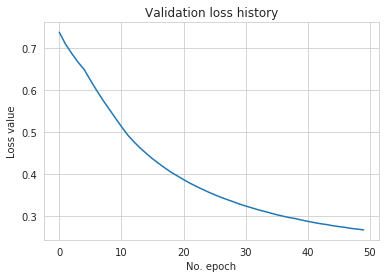

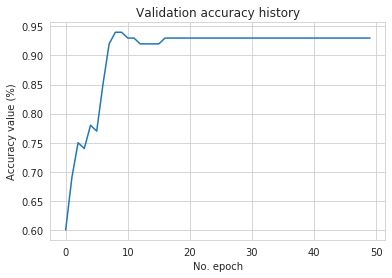

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [84]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(10, shuffle=True, random_state=0) 
R2=[] 
oos_y = []
oos_pred = []
fold = 0

# Must specify y StratifiedKFold for
for train, test in kf.split(X_train,y_train):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    from tensorflow.keras.callbacks import EarlyStopping
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann1.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)

    history1 = ann1.fit(x_train, Y_train, batch_size = 4, epochs = 50,validation_data=(x_test, Y_test),
          callbacks=[early_stop])
    
    pred = ann1.predict(x_test)
    pred = (pred > 0.5)
    oos_y.append(Y_test)
    # raw probabilities to chosen class (highest probability)

    oos_pred.append(pred)  

    # Measure this fold's accuracy
    from sklearn.metrics import confusion_matrix, accuracy_score

    score = accuracy_score(Y_test, pred)
    print(f"Fold score (accuracy): ",score)
    R2.append(score)


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(oos_y, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
holdout_pred = (holdout_pred > 0.5)
r2 = accuracy_score(y_test,holdout_pred)
print(f"Holdout score (Accuracy): {r2}")


Fold #1
Epoch 1/50
68/68 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.6370 - val_loss: 0.6230 - val_accuracy: 0.6667
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.6556 - val_loss: 0.5477 - val_accuracy: 0.6667
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.6852 - val_loss: 0.4880 - val_accuracy: 0.7333
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8519 - val_loss: 0.4429 - val_accuracy: 0.8333
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8815 - val_loss: 0.4096 - val_accuracy: 0.8333
Epoch 6/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8852 - val_loss: 0.3815 - val_accuracy: 0.8333
Epoch 7/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8926 - val_loss: 0.3587 - val_accuracy: 0.8667
Epoch 8/50
6

Epoch 9/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8519 - val_loss: 0.2768 - val_accuracy: 0.9333
Epoch 10/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8630 - val_loss: 0.2620 - val_accuracy: 0.9333
Epoch 11/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8704 - val_loss: 0.2534 - val_accuracy: 0.9333
Epoch 12/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8704 - val_loss: 0.2472 - val_accuracy: 0.9333
Epoch 13/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8741 - val_loss: 0.2407 - val_accuracy: 0.9333
Epoch 14/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8741 - val_loss: 0.2357 - val_accuracy: 0.9333
Epoch 15/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8741 - val_loss: 0.2327 - val_accuracy: 0.9333
Epoch 16/50
68

Epoch 17/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.9000 - val_loss: 0.1987 - val_accuracy: 0.9333
Epoch 18/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9000 - val_loss: 0.1985 - val_accuracy: 0.9333
Epoch 19/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9000 - val_loss: 0.1967 - val_accuracy: 0.9333
Epoch 20/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8963 - val_loss: 0.1965 - val_accuracy: 0.9333
Epoch 21/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9000 - val_loss: 0.1944 - val_accuracy: 0.9333
Epoch 22/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9000 - val_loss: 0.1949 - val_accuracy: 0.9333
Epoch 23/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8963 - val_loss: 0.1956 - val_accuracy: 0.9333
Epoch 24/50
6

68/68 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8667 - val_loss: 0.2529 - val_accuracy: 0.8667
Epoch 41/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8741 - val_loss: 0.2507 - val_accuracy: 0.8667
Epoch 42/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8815 - val_loss: 0.2499 - val_accuracy: 0.8667
Epoch 43/50
68/68 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8741 - val_loss: 0.2495 - val_accuracy: 0.8667
Epoch 44/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8815 - val_loss: 0.2483 - val_accuracy: 0.8667
Epoch 45/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8852 - val_loss: 0.2462 - val_accuracy: 0.8667
Epoch 46/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8852 - val_loss: 0.2434 - val_accuracy: 0.8667
Epoch 47/50
68/68 [======

68/68 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9111 - val_loss: 0.3427 - val_accuracy: 0.8333
Epoch 43/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9074 - val_loss: 0.3427 - val_accuracy: 0.8333
Epoch 44/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9074 - val_loss: 0.3338 - val_accuracy: 0.9000
Epoch 45/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.9074 - val_loss: 0.3431 - val_accuracy: 0.9000
Epoch 46/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.9111 - val_loss: 0.3418 - val_accuracy: 0.9000
Epoch 47/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9111 - val_loss: 0.3386 - val_accuracy: 0.9000
Epoch 48/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9148 - val_loss: 0.3469 - val_accuracy: 0.8333
Epoch 49/50
68/68 [======

68/68 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9222 - val_loss: 0.5889 - val_accuracy: 0.7333
Epoch 45/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9259 - val_loss: 0.5900 - val_accuracy: 0.7333
Epoch 46/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9296 - val_loss: 0.6046 - val_accuracy: 0.7333
Epoch 47/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9296 - val_loss: 0.6130 - val_accuracy: 0.7333
Epoch 48/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9259 - val_loss: 0.6214 - val_accuracy: 0.7333
Epoch 49/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9296 - val_loss: 0.6254 - val_accuracy: 0.7333
Epoch 50/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9296 - val_loss: 0.6422 - val_accuracy: 0.7333
Fold score (accuracy):  0

68/68 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9074 - val_loss: 0.1645 - val_accuracy: 0.9333
Epoch 47/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9037 - val_loss: 0.1574 - val_accuracy: 0.9333
Epoch 48/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9037 - val_loss: 0.1602 - val_accuracy: 0.9333
Epoch 49/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.9037 - val_loss: 0.1659 - val_accuracy: 0.9333
Epoch 50/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9037 - val_loss: 0.1646 - val_accuracy: 0.9333
Fold score (accuracy):  0.9333333333333333
Fold #8
Epoch 1/50
68/68 [==============================] - 0s 4ms/step - loss: 0.6031 - accuracy: 0.7259 - val_loss: 0.6189 - val_accuracy: 0.7000
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7667 - val_loss: 0.5606

68/68 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.8963 - val_loss: 0.2930 - val_accuracy: 0.9000
Epoch 49/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8963 - val_loss: 0.2920 - val_accuracy: 0.9000
Epoch 50/50
68/68 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9000 - val_loss: 0.2923 - val_accuracy: 0.9000
Fold score (accuracy):  0.9
Fold #9
Epoch 1/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.7519 - val_loss: 0.5989 - val_accuracy: 0.7667
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7741 - val_loss: 0.5437 - val_accuracy: 0.8000
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8000 - val_loss: 0.5012 - val_accuracy: 0.7667
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8111 - val_loss: 0.4675 - val_accuracy: 

68/68 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9185 - val_loss: 0.3389 - val_accuracy: 0.9000
Fold score (accuracy):  0.9
Fold #10
Epoch 1/50
68/68 [==============================] - 0s 4ms/step - loss: 0.7250 - accuracy: 0.4444 - val_loss: 0.6306 - val_accuracy: 0.5667
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6556 - val_loss: 0.5928 - val_accuracy: 0.8333
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8407 - val_loss: 0.5729 - val_accuracy: 0.9000
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.8852 - val_loss: 0.5611 - val_accuracy: 0.9333
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.8926 - val_loss: 0.5490 - val_accuracy: 0.9333
Epoch 6/50
68/68 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.8926 - val_loss: 0.5367 - val_accuracy: 0

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, holdout_pred)
print(cm)
accuracy_score(y_test, holdout_pred)

[[64  4]
 [ 3 29]]


0.93

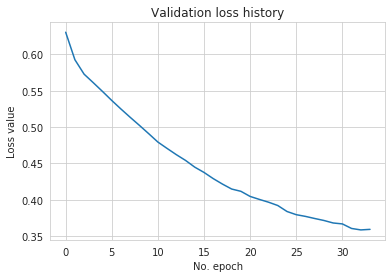

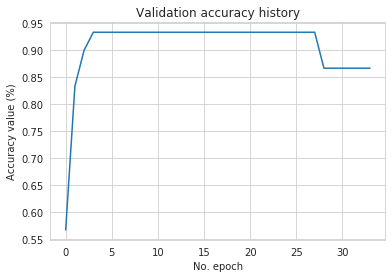

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [88]:
mean=sum(R2)/len(R2)
mean*100


89.0

In [89]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5
res*100

5.97215762238964